In [1]:
import sunpy.map
import matplotlib.pyplot as plt

In [22]:
# read sunpy maps
iris_path = r"..\..\..\_testdata\yana video\20130830_130928_4003257447\Si IV 1400"
aia_path = r"..\..\..\_testdata\yana video\aia\304"

im_iris=sunpy.map.Map(iris_path, sequence=True).as_array()
im_aia =sunpy.map.Map(aia_path, sequence=True).as_array()
iris_name = 'IRIS ' + iris_path.split('\\')[-1]
aia_name = 'AIA ' + aia_path.split('\\')[-1]

im_iris.shape, im_aia.shape

((417, 382, 800), (283, 273, 775))

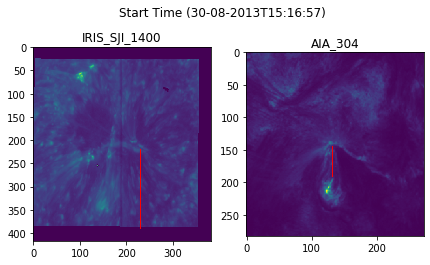

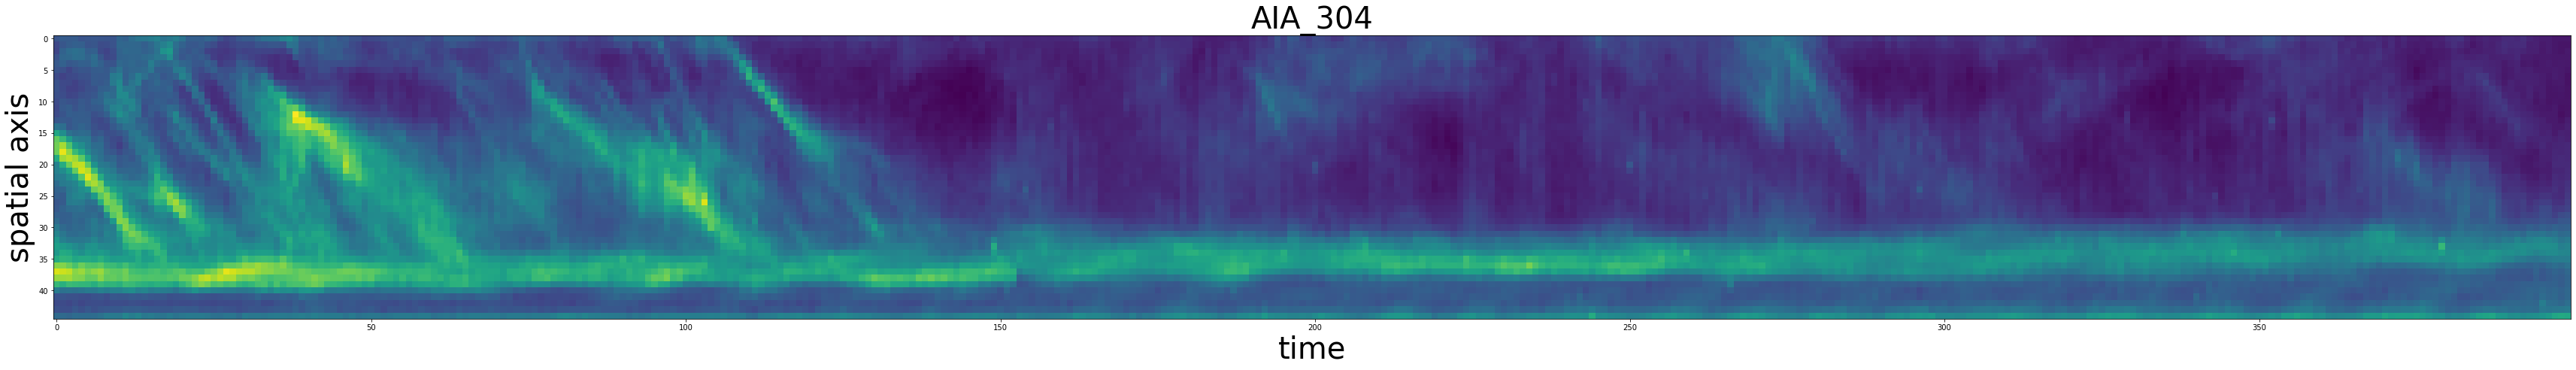

In [5]:
# example of time split with visible clumps (data from 30-08-2013T15:16:57 was used for creating it ) 

import numpy as np
plt.figure(figsize=(7, 4))

plt.subplot(1, 2, 1)
            
y1=93

x = [230, 230]
y = [417-198, 417-29]
plt.plot(x, y, color="red", linewidth=1)
plt.title(iris_name)
plt.imshow(np.flip(im_iris[:, :, 0], axis=0))


plt.subplot(1, 2, 2)

x = [131, 131]
y = [283-93, 283-(93+45)]
plt.plot(x, y, color="red", linewidth=1)
plt.title(aia_name)
plt.imshow(np.flip(im_aia[:, :,0 ], axis=0))

plt.suptitle('Start Time (30-08-2013T15:16:57)')
plt.show()

plt.figure(figsize=(60, 60))

plt.subplot(1, 1, 1)
image=im_aia[y1: y1+45, 131, :400]
plt.title(aia_name, fontsize=40)
plt.xlabel('time', fontsize=40)
plt.ylabel('spatial axis', fontsize=40)
_ = plt.imshow(image)

### Automatically extract coordinates

In [6]:
import astropy.units as u
from astropy.coordinates import SkyCoord

In [23]:
# find IRIS pixel coords

# 1. read world coordinate iris from JHV
x1_w = -538
x2_w = -538
y1_w = 57  # bottom of slit in arcsec ('')
y2_w = 117  # top of slit in arcsec ('')

# 2. read first map and transform  --  TODO: take middle obs, as location might shift slightly?
mc=sunpy.map.Map(iris_path + r"\0.fits")
s1=s=SkyCoord(x1_w*u.arcsec, y1_w*u.arcsec, frame=mc.coordinate_frame)
s2=SkyCoord(x2_w*u.arcsec, y2_w*u.arcsec, frame=mc.coordinate_frame)
iris_px1 = mc.world_to_pixel(s1)
iris_px2 =  mc.world_to_pixel(s2)

iris_px1, iris_px2

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


For frame 'heliographic_stonyhurst' the following metadata is missing: hglt_obs,hgln_obs
For frame 'heliographic_carrington' the following metadata is missing: crlt_obs,crln_obs
 [sunpy.map.mapbase]


(PixelPair(x=<Quantity 189.08273662 pix>, y=<Quantity 29.00884969 pix>),
 PixelPair(x=<Quantity 185.01175406 pix>, y=<Quantity 389.67118639 pix>))

In [24]:
# find AIA pixel coords

mc=sunpy.map.Map(aia_path + r"\0.fits")
s1=s=SkyCoord(x1_w*u.arcsec, y1_w*u.arcsec, frame=mc.coordinate_frame)
s2=SkyCoord(x2_w*u.arcsec, y2_w*u.arcsec, frame=mc.coordinate_frame)
aia_px1 = mc.world_to_pixel(s1)
aia_px2 = mc.world_to_pixel(s2)

aia_px1, aia_px2

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


For frame 'heliographic_stonyhurst' the following metadata is missing: hglt_obs,hgln_obs
For frame 'heliographic_carrington' the following metadata is missing: crlt_obs,crln_obs
 [sunpy.map.mapbase]


(PixelPair(x=<Quantity 120.37169575 pix>, y=<Quantity 92.3328274 pix>),
 PixelPair(x=<Quantity 119.24423359 pix>, y=<Quantity 192.32621205 pix>))

In [32]:
#initialize pixel for time-split

#aia
aia_y1=aia_px1.y.value
aia_y2=aia_px2.y.value
aia_x = (aia_px1.x.value + aia_px2.x.value) / 2

#iris
iris_y1=iris_px1.y.value
iris_y2=iris_px2.y.value
iris_x = (iris_px1.x.value + iris_px2.x.value) / 2

In [33]:
[round(n) for n in [aia_x, aia_y1, aia_y2, iris_x, iris_y1, iris_y2]]

[120, 92, 192, 187, 29, 390]

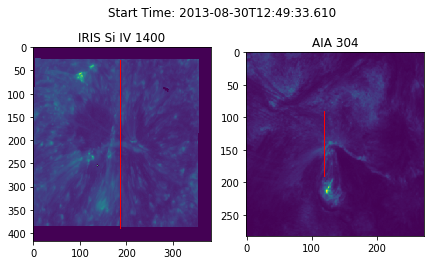

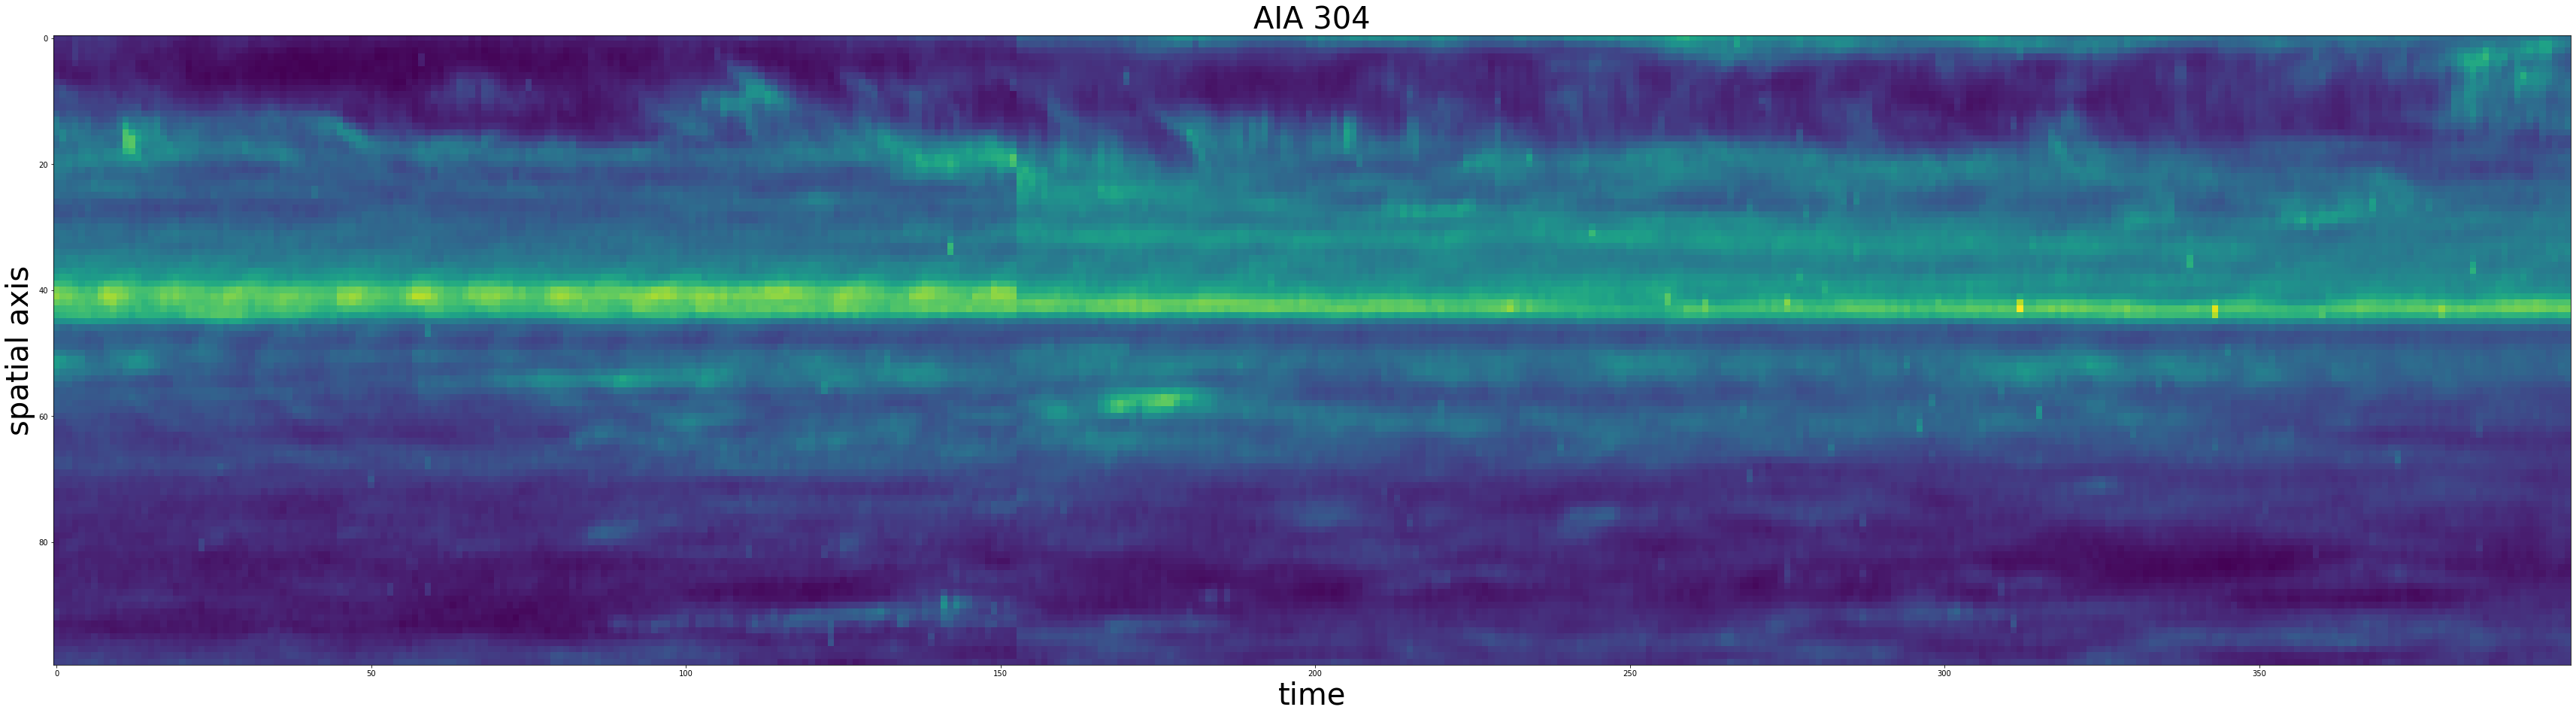

In [36]:
# example of time split with visible clumps (data from 30-08-2013T15:16:57 was used for creating it ) 

import numpy as np
plt.figure(figsize=(7, 4))

plt.subplot(1, 2, 1)
x = [iris_x, iris_x]
y = [im_iris.shape[0] - iris_y2, im_iris.shape[0] - iris_y1]
plt.plot(x, y, color="red", linewidth=1)
plt.title(iris_name)
plt.imshow(np.flip(im_iris[:, :, 0], axis=0))

plt.subplot(1, 2, 2)
x = [aia_x, aia_x]
y = [im_aia.shape[0] - aia_y1, im_aia.shape[0] - aia_y2]
plt.plot(x, y, color="red", linewidth=1)
plt.title(aia_name)
plt.imshow(np.flip(im_aia[:, :,0 ], axis=0))

plt.suptitle('Start Time: ' + mc.date.isot)
plt.show()

plt.figure(figsize=(60, 60))

plt.subplot(1, 1, 1)
y1, y2 = int(round(aia_y1)), int(round(aia_y2))
x = int(round(aia_x))
image=im_aia[y1:y2, x, :400]
plt.title(aia_name, fontsize=40)
plt.xlabel('time', fontsize=40)
plt.ylabel('spatial axis', fontsize=40)
_ = plt.imshow(image)